# Подбор персонала

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(); # более красивый внешний вид графиков по умолчанию


In [3]:
data = pd.read_csv('rabotaru_ru/data/train_public.csv')

In [4]:
data.head(5)

,id,custom_position,operating_schedule_id,description,salary_from,offer_education_id,age_from,age_to,is_agency,is_nonresident,offer_experience_year_count,salary_to,is_male,driving_license,region_id,company_id,city_id,target_prof
0,268842,Подсобный рабочий,1,<strong>Обязанности:</strong><br />\r\n<ul>\r\...,34000,0,NaN,NaN,True,True,1.0,41000.0,True,[],{1783},1234787.0,70,рабочий
1,19090,Разнорабочий,7,<br />\nТребования: <br>На овощную базу в Подм...,66000,0,NaN,NaN,False,False,NaN,NaN,NaN,[],{3},NaN,1,разнорабочий
2,315832,Повар холодного цеха,1,<br />\nТребования: <br>Приготовление салатов....,40000,0,NaN,NaN,False,False,NaN,40000.0,NaN,[],{3},NaN,1,повар
3,365230,Разнорабочий,7,<strong>Обязанности:</strong><br />\r\n<ul>\r\...,35000,0,NaN,NaN,False,True,-100.0,40000.0,NaN,[],{5807},2784163.0,70,разнорабочий
4,154105,Региональный торговый представитель по Смоленс...,1,<strong>Обязанности:</strong><br /> &nbsp;<br ...,30000,4,NaN,NaN,False,True,2.0,70000.0,NaN,[],{362},1703984.0,258,представитель


In [13]:
data.columns

Index(['id', 'custom_position', 'operating_schedule_id', 'description',
       'salary_from', 'offer_education_id', 'age_from', 'age_to', 'is_agency',
       'is_nonresident', 'offer_experience_year_count', 'salary_to', 'is_male',
       'driving_license', 'region_id', 'company_id', 'city_id', 'target_prof'],
      dtype='object')

In [16]:
data.head(1).T

,0
id,268842
custom_position,Подсобный рабочий
operating_schedule_id,1
description,<strong>Обязанности:</strong><br />\r\n<ul>\r\...
salary_from,34000
offer_education_id,0
age_from,NaN
age_to,NaN
is_agency,True
is_nonresident,True


### Описание фичей

  - **id** - Идентификатор вакансии
  - **custom_position** - Название вакансии
  - **operating_schedule_id** - идентификатор графика работы, возможные значения указаны ниже
  - **salary_from** - зарплата от (всегда есть)
  - **salary_to** - потолок зарплаты
  - **description** - текстовое описание вакансии вместе с html тегами и знаками препинания
  - **offer_education_id** - идентификатор образования, расшифровку см. ниже
  - **offer_experience_year_count** - требуемый опыт (лет)
  - **age_from** - минимальный возраст работы
  - **age_to** - максимальный возраст работы
  - **company_id** - идентификатор компании, встречаются вакансии без компаний
  - **city_id** - идентификатор региона размещения (Москва и МО, ), крупные аггломерации
  - **is_agency** - является ли компания агенством
  - **is_nonresident** - доступна ли вакансия для иностранных граждан
  - **is_male** - ищут работников мужского (True), женского (False) пола, в случае пустого значения пол не имеет значения
  - **driving_license** - требуемые категории водительсктх прав
  - **region_id** - города в которых есть офисы компании и куда производится набор сотрудников (Set)
  - **target_prof** - рекомендуемая групповая профессия

In [43]:
# типы данных 
data.dtypes

id                               int64
custom_position                 object
operating_schedule_id           object
description                     object
salary_from                      int64
offer_education_id              object
age_from                       float64
age_to                         float64
is_agency                         bool
is_nonresident                    bool
offer_experience_year_count    float64
salary_to                      float64
is_male                           bool
driving_license                 object
region_id                       object
company_id                      object
city_id                         object
target_prof                     object
dtype: object

In [42]:
# меняем тип некоторых колонок на категориальный
data['operating_schedule_id'] = data['operating_schedule_id'].astype('object')
data['offer_education_id'] = data['offer_education_id'].astype('object')
data['is_male'] = data['is_male'].astype('bool')
data['company_id'] = data['company_id'].astype('object')
data['city_id'] = data['city_id'].astype('object')

In [48]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('Категориальные признаки: ', categorical_columns)
print('Числовые признаки: ', numerical_columns)

Категориальные признаки:  ['custom_position', 'operating_schedule_id', 'description', 'offer_education_id', 'driving_license', 'region_id', 'company_id', 'city_id', 'target_prof']
Числовые признаки:  ['id', 'salary_from', 'age_from', 'age_to', 'is_agency', 'is_nonresident', 'offer_experience_year_count', 'salary_to', 'is_male']


In [18]:
# кол-во строк (вакансий) и колонок (их признаков)
data.shape

(56297, 18)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56297 entries, 0 to 56296
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           56297 non-null  int64  
 1   custom_position              56297 non-null  object 
 2   operating_schedule_id        56297 non-null  int64  
 3   description                  56297 non-null  object 
 4   salary_from                  56297 non-null  int64  
 5   offer_education_id           56297 non-null  int64  
 6   age_from                     15798 non-null  float64
 7   age_to                       12931 non-null  float64
 8   is_agency                    56297 non-null  bool   
 9   is_nonresident               56297 non-null  bool   
 10  offer_experience_year_count  38622 non-null  float64
 11  salary_to                    34829 non-null  float64
 12  is_male                      8804 non-null   object 
 13  driving_license 

In [19]:
# описательная статистика по числоавым признакам
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,56297.0,2.358766e+05,135901.728858,18.0,118547.0,235786.0,353529.0,471177.0
operating_schedule_id,56297.0,2.883155e+00,2.323710,1.0,1.0,2.0,3.0,7.0
salary_from,56297.0,3.815131e+04,86681.631959,-1.0,20000.0,35000.0,53000.0,19002500.0
offer_education_id,56297.0,3.962023e-01,1.021039,0.0,0.0,0.0,0.0,4.0
age_from,15798.0,2.042543e+01,4.056352,14.0,18.0,18.0,22.0,60.0
age_to,12931.0,5.360660e+01,12.556347,22.0,45.0,52.0,60.0,99.0
offer_experience_year_count,38622.0,-3.488214e+01,48.606458,-100.0,-100.0,0.0,1.0,10.0
salary_to,34829.0,4.691282e+04,111741.706222,-1.0,20000.0,40000.0,65000.0,19002500.0
company_id,42499.0,1.536680e+06,674858.744798,62.0,1141124.0,1589177.0,2068856.0,2995291.0
city_id,56297.0,3.427218e+01,62.533842,1.0,1.0,9.0,36.0,272.0


In [ ]:
# описательная статистика по категориальным признакам
data[categorical_columns].describe().T

## Исследование признаков

### рекомендуемая групповая профессия (целевая переменная)

In [25]:
# сколько уникальных групповых профессий ?
data['target_prof'].nunique()

521

In [29]:
data['target_prof'].unique()[:10]

array(['рабочий', 'разнорабочий', 'повар', 'представитель', 'слесарь',
       'специалист', 'электромонтер', 'колорист', 'водитель',
       'администратор'], dtype=object)

In [31]:
# статистика распределения профессий (в абсолютных значениях)
data['target_prof'].value_counts()

водитель      4885
продавец      3360
менеджер      2399
повар         2284
грузчик       2137
              ... 
ретушер          1
накатчик         1
забойщик         1
колеровщик       1
сливщик          1
Name: target_prof, Length: 521, dtype: int64

In [32]:
# статистика распределения профессий (в относительных долях)
data['target_prof'].value_counts(normalize = True)

водитель      0.086772
продавец      0.059683
менеджер      0.042613
повар         0.040571
грузчик       0.037959
                ...   
ретушер       0.000018
накатчик      0.000018
забойщик      0.000018
колеровщик    0.000018
сливщик       0.000018
Name: target_prof, Length: 521, dtype: float64

<AxesSubplot:>

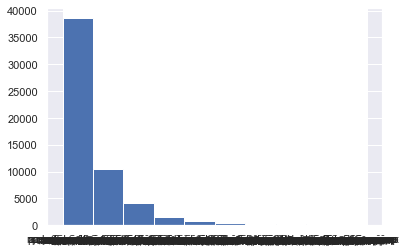

In [33]:
data['target_prof'].hist()

## Визуализация

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


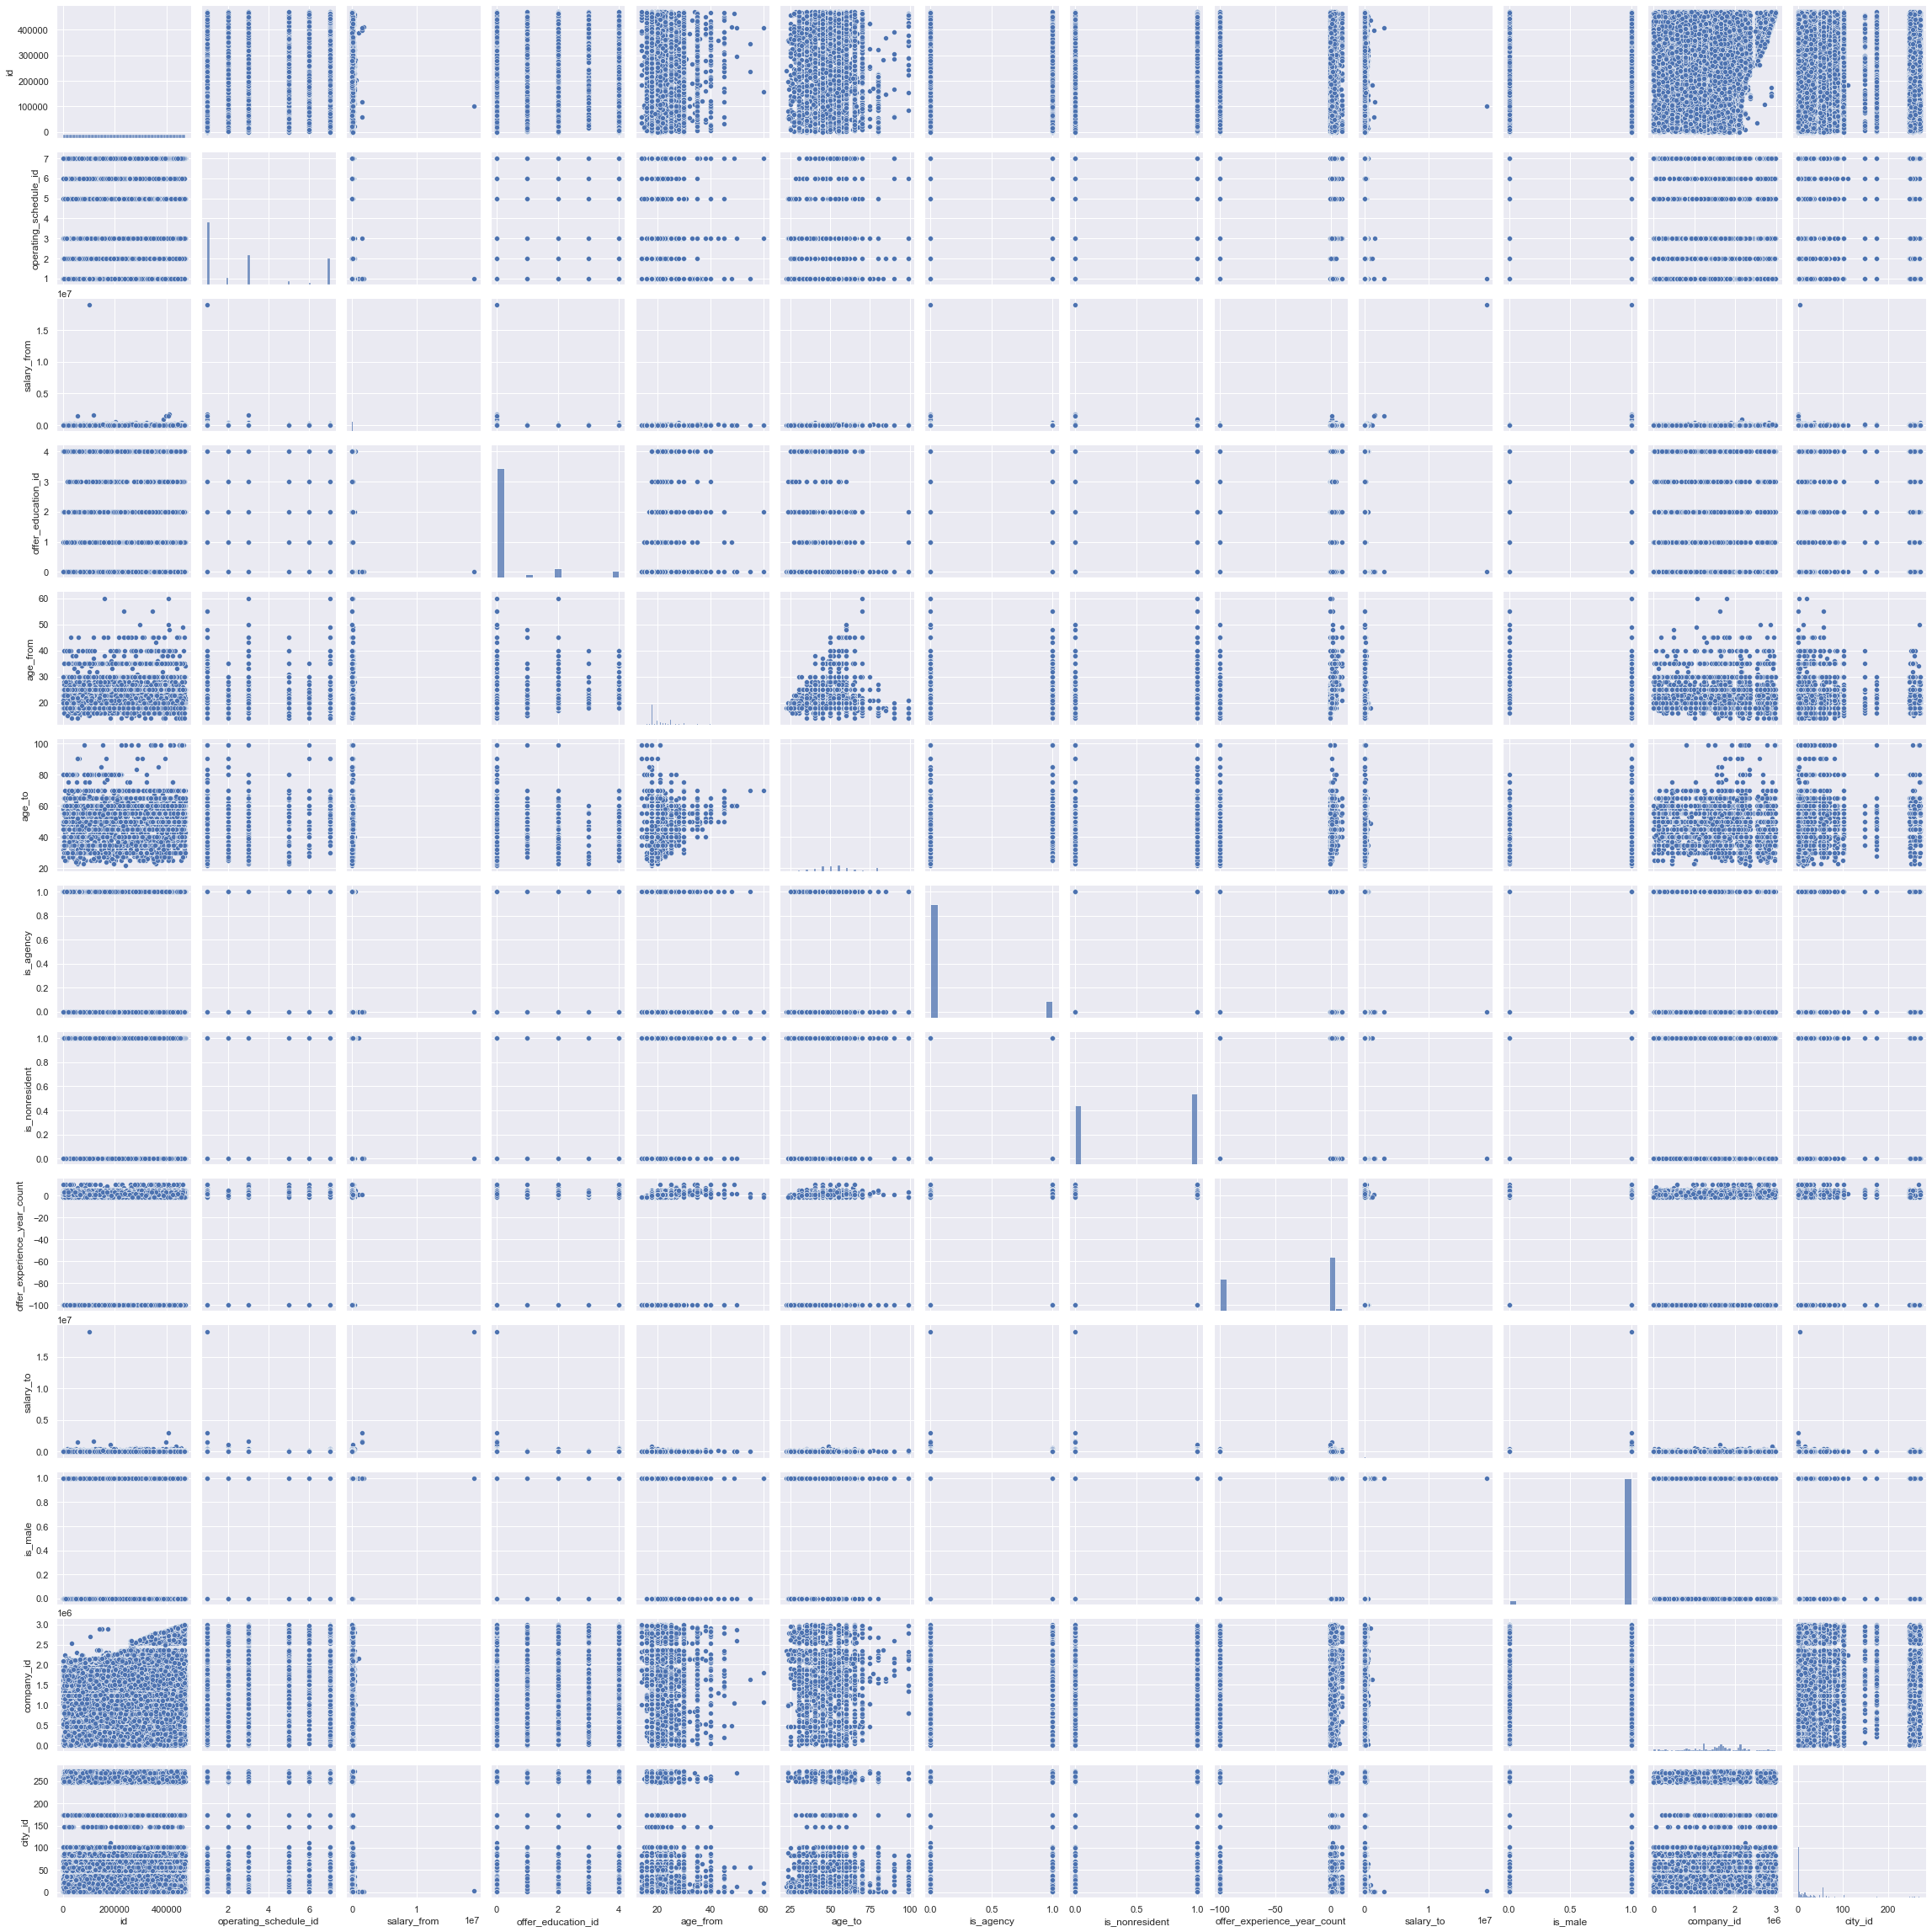

In [52]:
sns.pairplot(data)

In [55]:
# матрица корреляций
data.corr()

,id,salary_from,age_from,age_to,is_agency,is_nonresident,offer_experience_year_count,salary_to,is_male
id,1.000000,0.000573,0.009224,-0.150269,-0.048694,0.048434,-0.029145,0.010016,-0.021733
salary_from,0.000573,1.000000,0.207308,0.000840,0.046251,0.049817,0.166805,0.966633,0.016187
age_from,0.009224,0.207308,1.000000,-0.107405,-0.006695,-0.002874,0.422167,0.092278,-0.222600
age_to,-0.150269,0.000840,-0.107405,1.000000,-0.017456,0.184849,-0.230461,-0.026269,0.156960
is_agency,-0.048694,0.046251,-0.006695,-0.017456,1.000000,0.066788,0.008550,0.044461,0.014770
is_nonresident,0.048434,0.049817,-0.002874,0.184849,0.066788,1.000000,0.079616,0.065214,-0.061705
offer_experience_year_count,-0.029145,0.166805,0.422167,-0.230461,0.008550,0.079616,1.000000,0.059082,0.025210
salary_to,0.010016,0.966633,0.092278,-0.026269,0.044461,0.065214,0.059082,1.000000,0.008329
is_male,-0.021733,0.016187,-0.222600,0.156960,0.014770,-0.061705,0.025210,0.008329,1.000000


In [ ]:
#sns.heatmap(data[numerical_columns])

## Преобразование признаков

In [49]:
data[categorical_columns].describe().T

,count,unique,top,freq
custom_position,56297,14345,Грузчик,981
operating_schedule_id,56297,6,1,27010
description,56297,41692,<br />\nТребования: <br> <br />\nИнформация о ...,293
offer_education_id,56297,5,0,47394
driving_license,56297,16,[],54806
region_id,56297,1486,{3},18167
company_id,42499.0,10218.0,1234787.0,2040.0
city_id,56297,67,1,16144
target_prof,56297,521,водитель,4885


## Предобработка данных

### Заполнение пропущенных значений

In [59]:
data.count(axis=0)

id                             56297
custom_position                56297
operating_schedule_id          56297
description                    56297
salary_from                    56297
offer_education_id             56297
age_from                       15798
age_to                         12931
is_agency                      56297
is_nonresident                 56297
offer_experience_year_count    38622
salary_to                      34829
is_male                        56297
driving_license                56297
region_id                      56297
company_id                     42499
city_id                        56297
target_prof                    56297
dtype: int64

## Построение классификатора

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=42)
